<span style="color:lightblue"> 

# Tasks  
***
Applied Statistics module with lecturer Dr Ian McLoughlin

Semester 4, Higher Diploma in Science in Data Analytics at ATU 2023/24 


Submission due date: 20/12/2023
 
Author: Shane Keenan 
Status: Ongoing
***
</span>

Import all required python packages needed 

In [251]:
# numerical package for arrays and matrices
import numpy as np 
# package for data manipulation and analysis
import pandas as pd 

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools
import math

# plotting library
import matplotlib.pyplot as plt 
import seaborn as sns
# statistical graphics package
import scipy.stats as stat
from scipy.stats import norm
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import ttest_rel


import random 
from PIL import Image
import os


# displayed plot quality improvement 
%matplotlib inline
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # For Retina displays or high-res screens

C:\Users\shane\AppData\Local\Temp\ipykernel_14292\1719713620.py:32: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')  # For Retina displays or high-res screens


<span style="color:lightblue"> 

### Task 1: Permutations and Combinations
***


Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.
</span>


***




### Number of unique combinations 

Use `math.comb()` function which calculated the function: 

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

where **n** is the total number of cups of tea and **k** is number of cups of tea with milk in first. 

This returns the number of ways to choose **k** items from **n** items without repetition and without order.



Total number of combinations of selecting 6 cups from 12:

$\binom{12}{6} = \frac{12!}{6!(12-6)!} = \frac{12!}{6!6!}$


### define parameters 

In [252]:
# the total number of cups of tea - n 
n = 12
# the number of cups of tea with milk in first - k 
k = 6

In [253]:
# Number of ways of selecting six cups from twelve.
total_combs = math.comb(n, k)
total_combs

924

This equates to 924 combinations.

#### Sanity check - calculate directly using math.factorial() 

In [254]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

Probability of selecting the correct 6 cups:

𝑃(no errors) = 1/924  = 0.001082 (apprximately = 0.108 %) 


In [255]:
# The probability that she (randomly) selects the six correct cups.
P_no_error = 1 / total_combs
P_no_error

0.0010822510822510823

"Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error."



### 1 Error allowed 

The probability of making 1 error - that is correctly selecting 5 correct cups of tea with milk in first out of the 6 cups available times incorrectly selecting 1 cup of tea without milk in first out of the 6 available.  

In [256]:
# selecting 5 correct cups from the 6 correct (mil in first) and 1 incorrect from the 6 incorrect (milk in second)
ways_1_error = math.comb(6, 5) * math.comb(6, 1)
ways_1_error

36

So the probability of selecting exactly 5 cups correctly is given by 

In [257]:
P_1_error_exactly = ways_1_error / total_combs
P_1_error_exactly

0.03896103896103896

However we are asked to calculate the probability of selecting **_at least_** 5 cups correcly 

this includes the no error scenario as well. 

In [258]:
P_1_error = P_no_error + P_1_error_exactly
P_1_error

0.04004329004329004

Probability of making at least 1 error (0 or 1 errors):


P(1 error) = 0.04004 (approximately 4.00%)

This is the combined probability of selecting all 6 cups correctly (0 errors) or selecting 5 correct and 1 incorrect (1 error).


So.. Yes, I think it reasonable to accept 1 error as the probability is still small at 4%.





--

"Would you accept two errors? Explain."

--
### 2 errors allowed 

The probability of making at least 2 errors - that is correctly selecting 4 correct cups of tea with milk in first out of the 6 cups available times incorrectly selecting 2 cups of tea without milk in first out of the 6 available.  


In [259]:
# selecting 4 correct cups from the 6 correct (milk in first) and 2 incorrect from the 6 incorrect (milk in second)
ways_2_errors = math.comb(6, 4) * math.comb(6, 2)
ways_2_errors

225

So the probablility of making exactly 2 errors (selecting 4 correctly) is 

P(2_errors) = 0.24351 (approximately 24.3 %)

In [260]:
p_2_errors_exact = ways_2_errors / total_combs
p_2_errors_exact

0.2435064935064935

with a probability of least 2 errors (selecting 4 correctly) being 

P(2_errors) = 0.28355 (approximately 28.4 %)

In [261]:
p_2_errors = p_2_errors_exact + P_1_error_exactly + P_no_error;
p_2_errors

0.28354978354978355

Should we allow two errors? 

No, the probability of making at least two errors is much higher around 28.4%, which is significantly larger than the probability for one error (at around 4 %). 

Allowing two errors would make it too likely for the person to guess correctly purely by random chance, so the bar would be set too low. 

In my optinion, a minimum of 1 error is all we can accept. 

### Histogram of probability distriubtion 

This section is a repeat of the lecture notes but updated for n = 12 and k = 6 and shows the new probability distribution for this scenario. 

In [262]:
# The cup labels.
labels = list(range(n))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [263]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, k))
combs[0] # select 1st in the list for example 

(0, 1, 2, 3, 4, 5)

In [264]:
# Number of combinations.
len(combs)

924

In [265]:
# Select six cups at random to put milk in first.
labels_milk = random.sample(labels, 6)
# Sort, inplace.
labels_milk.sort()
labels_milk

[1, 4, 7, 9, 10, 11]

In [266]:
# Turn labels_milk into a set.
set(labels_milk)

{1, 4, 7, 9, 10, 11}

In [267]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {1, 4} 2
(0, 1, 2, 3, 4, 6) {1, 4} 2
(0, 1, 2, 3, 4, 7) {1, 4, 7} 3
(0, 1, 2, 3, 4, 8) {1, 4} 2
(0, 1, 2, 3, 4, 9) {1, 4, 9} 3
(0, 1, 2, 3, 4, 10) {1, 10, 4} 3
(0, 1, 2, 3, 4, 11) {1, 11, 4} 3
(0, 1, 2, 3, 5, 6) {1} 1
(0, 1, 2, 3, 5, 7) {1, 7} 2
(0, 1, 2, 3, 5, 8) {1} 1
(0, 1, 2, 3, 5, 9) {1, 9} 2
(0, 1, 2, 3, 5, 10) {1, 10} 2
(0, 1, 2, 3, 5, 11) {1, 11} 2
(0, 1, 2, 3, 6, 7) {1, 7} 2
(0, 1, 2, 3, 6, 8) {1} 1
(0, 1, 2, 3, 6, 9) {1, 9} 2
(0, 1, 2, 3, 6, 10) {1, 10} 2
(0, 1, 2, 3, 6, 11) {1, 11} 2
(0, 1, 2, 3, 7, 8) {1, 7} 2
(0, 1, 2, 3, 7, 9) {1, 9, 7} 3
(0, 1, 2, 3, 7, 10) {1, 10, 7} 3
(0, 1, 2, 3, 7, 11) {1, 11, 7} 3
(0, 1, 2, 3, 8, 9) {1, 9} 2
(0, 1, 2, 3, 8, 10) {1, 10} 2
(0, 1, 2, 3, 8, 11) {1, 11} 2
(0, 1, 2, 3, 9, 10) {1, 10, 9} 3
(0, 1, 2, 3, 9, 11) {1, 11, 9} 3
(0, 1, 2, 3, 10, 11) {1, 10, 11} 3
(0, 1, 2, 4, 5, 6) {1, 4} 2
(0, 1, 2, 4, 5, 7) {1, 4, 7} 3
(0, 1, 2, 4, 5, 8) {1, 4} 2
(0, 1, 2, 4, 5, 9) {1, 4, 9} 3
(0, 1, 2, 4, 5, 10) {1, 10, 4} 3
(0, 1, 2, 4, 5, 

In [268]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)
counts[1]

array([  1,  36, 225, 400, 225,  36,   1], dtype=int64)

Plot the Probability Distribution of Correctly selected tea cups in Tea Tasting Experiment

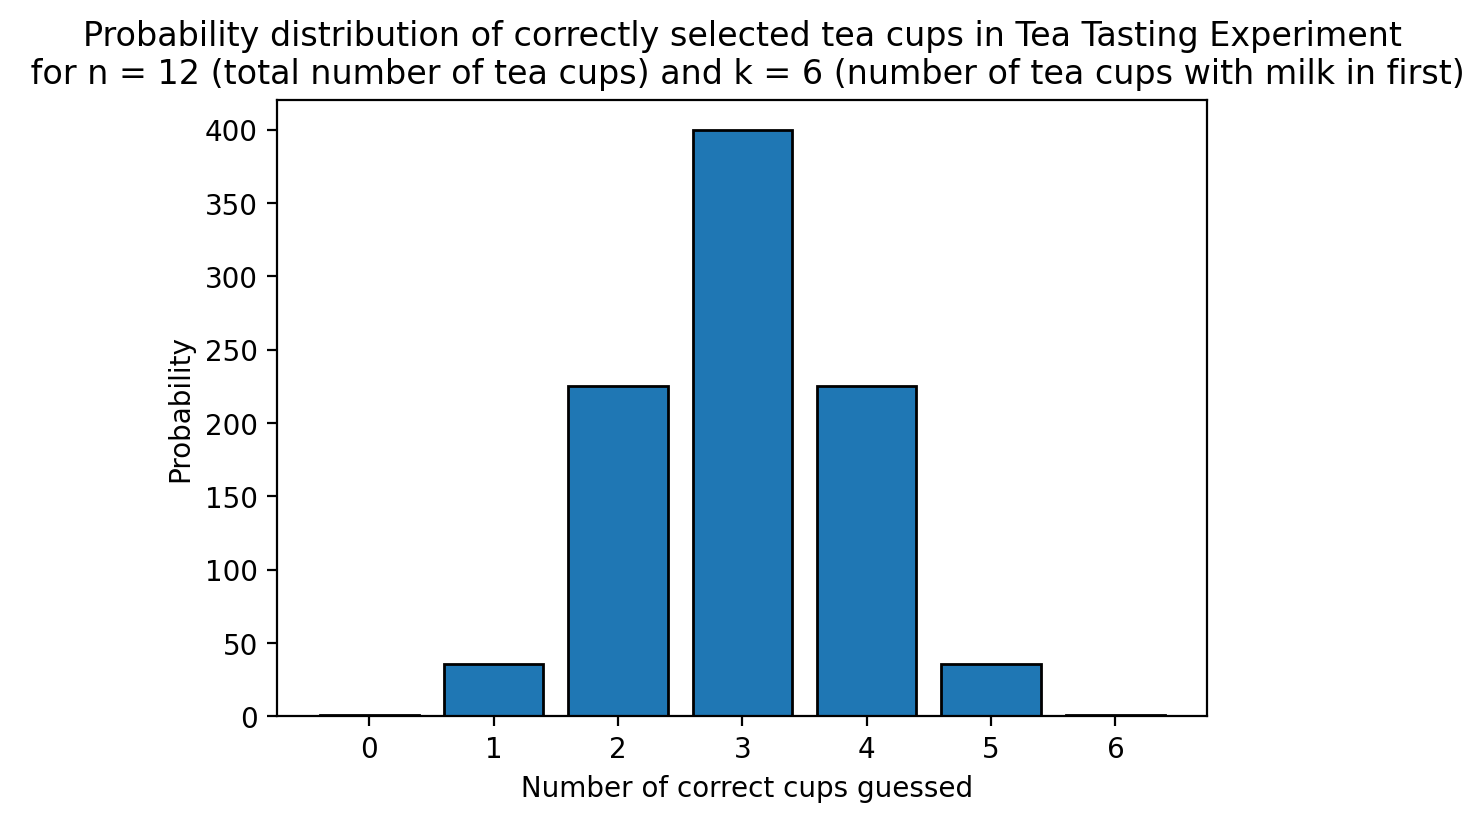

In [269]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))
# plot the bar chart.
ax.bar(counts[0], counts[1],edgecolor='black');
ax.set_title("Probability distribution of correctly selected tea cups in Tea Tasting Experiment\n for n = 12 (total number of tea cups) and k = 6 (number of tea cups with milk in first)")
ax.set_ylabel("Probability")
ax.set_xlabel(" Number of correct cups guessed")
plt.show()

<span style="color:green">  

***
End of Task   1  
***

</span>

<span style="color:lightblue">  


### Task 2:  numpy's Normal Distribution


***
In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

***
</span>

Generate normal distributions 


generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0` using ``numpy.random.normal()`` function

https://docs.scipy.org/doc/scipy/reference/stats.html


In [270]:
mean = 10.0 # set mean 
std = 3.0  # set standard deviation 

# generate 100,000 x values from 0 to 20 
x_values = np.linspace(0, 20, 100000)
# using numpy.random.normal function generate normal distribution 
y_values_norm = np.random.normal(mean, std, 100000)
# scipy.stats part of the SciPy library does a nice job of generating the probability density function for us. 
y_values_pdf = norm.pdf(x_values, mean, std)

Plot the histogram

Bin selection 

There are quite a number of different methods to choose from here. I  

[1] https://www.statisticshowto.com/choose-bin-sizes-statistics/

[2] https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

[3] https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram

Number of bins chosen: 147


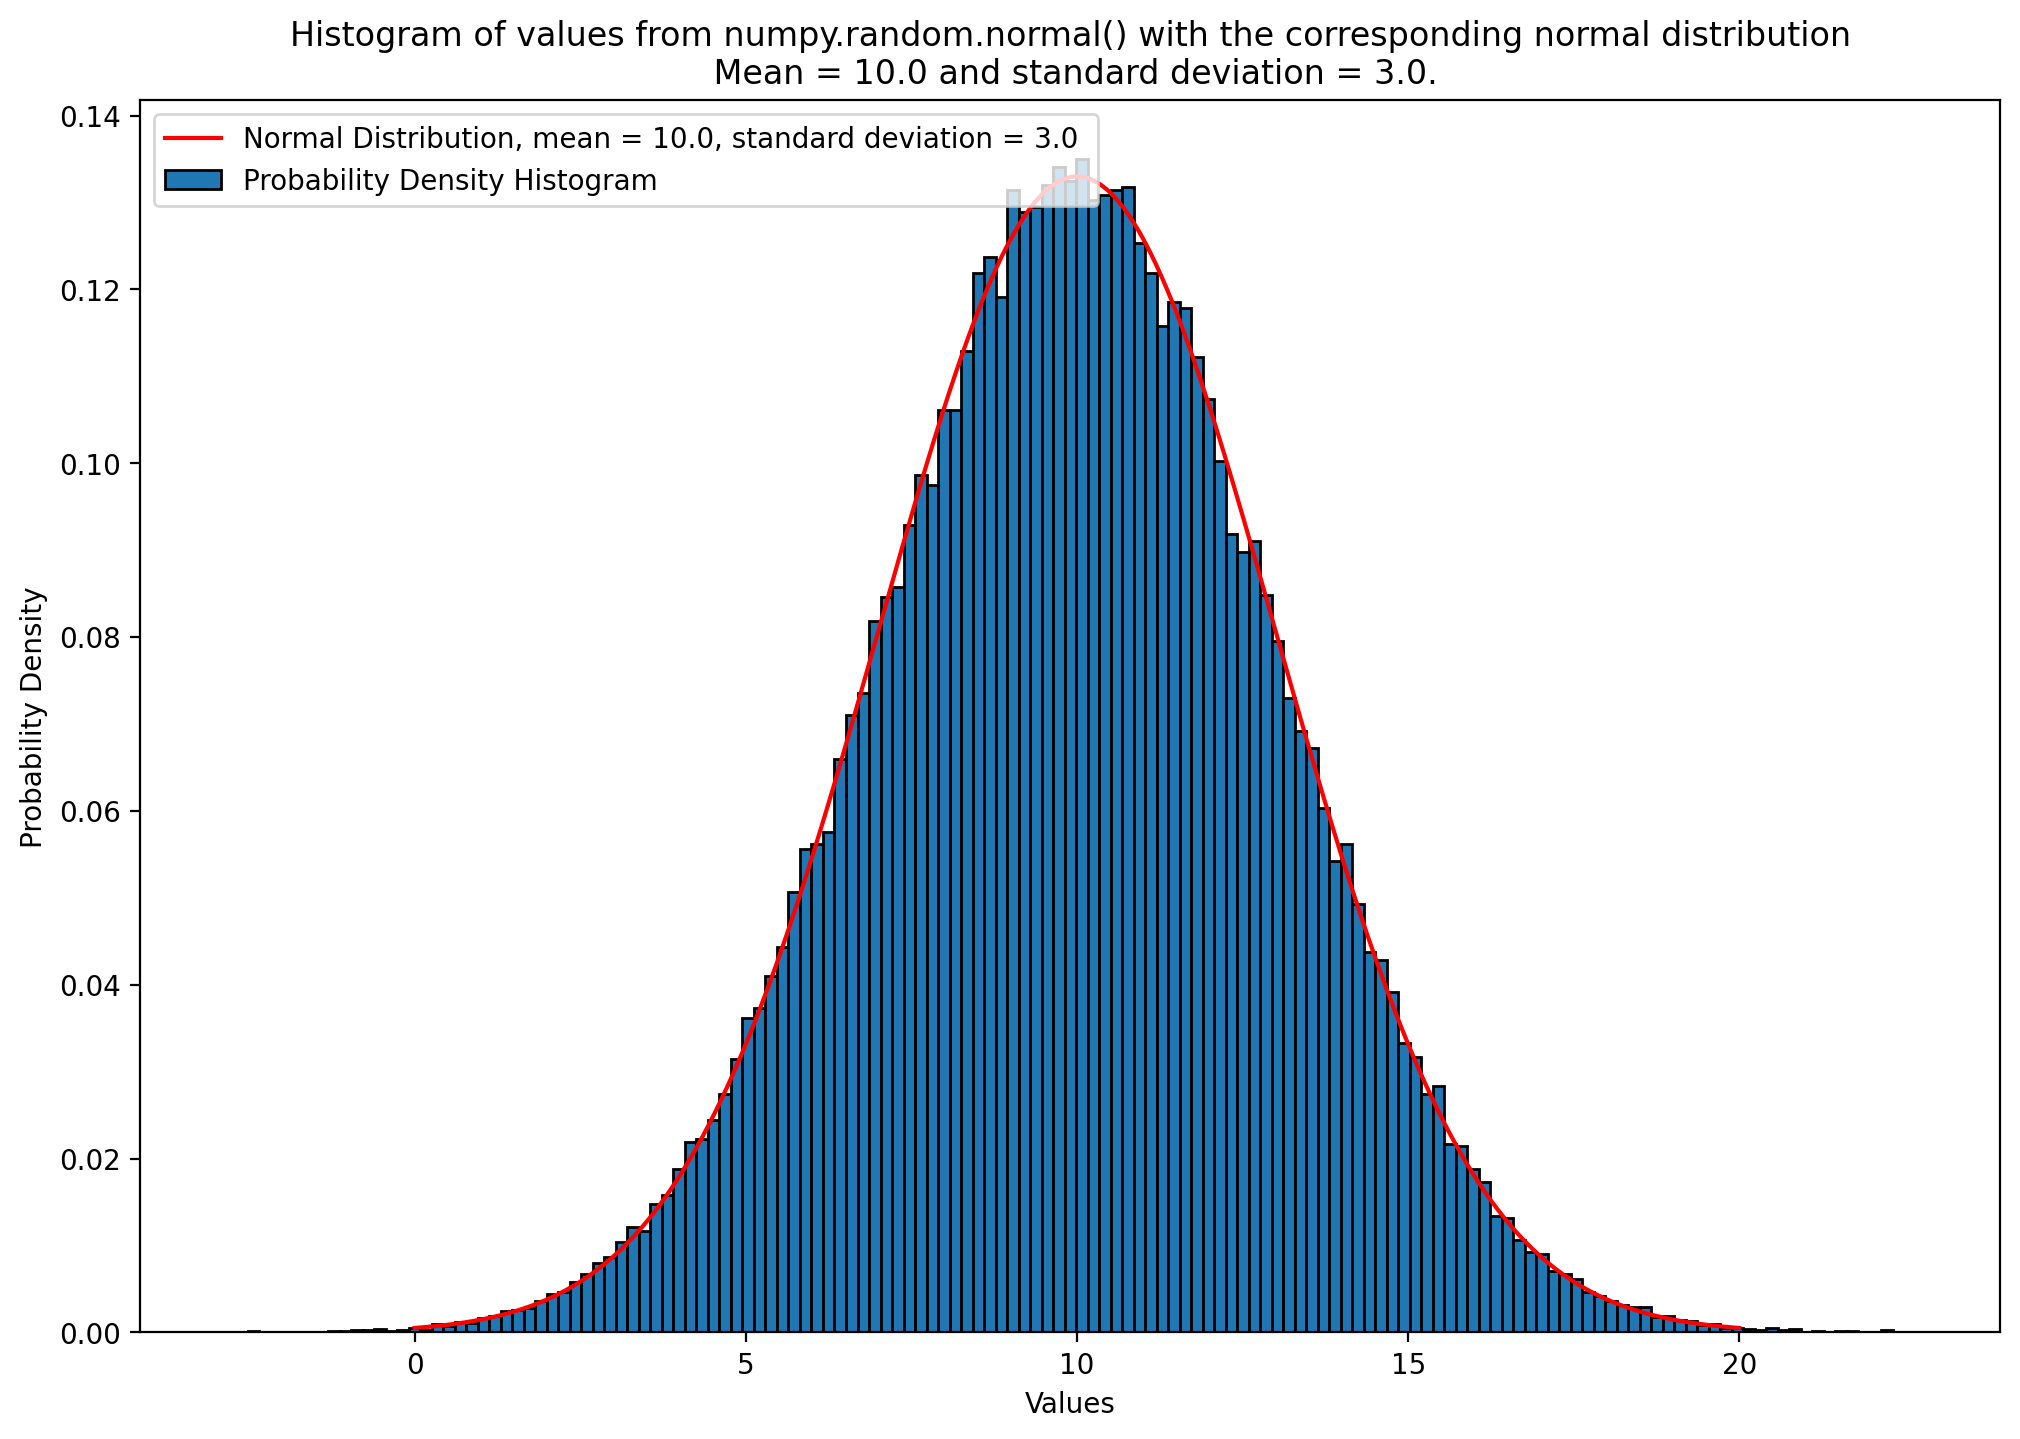

In [271]:
# define the number of bins or range. 
bins = 'auto'

fig, ax = plt.subplots(figsize=(12, 8))
# plot the normal distribution probability density function in red
ax.plot(x_values, y_values_pdf, 'r', label=f'Normal Distribution, mean = {mean}, standard deviation = {std} ')
# plot the histogram in blue 
counts, bin_edges,x = ax.hist(y_values_norm, bins = bins, density=True, label='Probability Density Histogram', edgecolor='black')
num_bins = len(bin_edges) - 1 # extract out the number of bins automatically selected out of curiosity
print(f"Number of bins chosen: {num_bins}")

ax.set_title('Histogram of values from numpy.random.normal() with the corresponding normal distribution\n Mean = 10.0 and standard deviation = 3.0.')
ax.set_xlabel('Values')
ax.set_ylabel('Probability Density')
ax.legend(loc='upper left')
plt.show()

the QQ (Quartile-Quartile) plot or normal probability plot can also give a nice visual indication of how well the data fits a normal distribution. It plots z-scores (normal scores) against your data set

https://www.statisticshowto.com/normal-probability-plot/

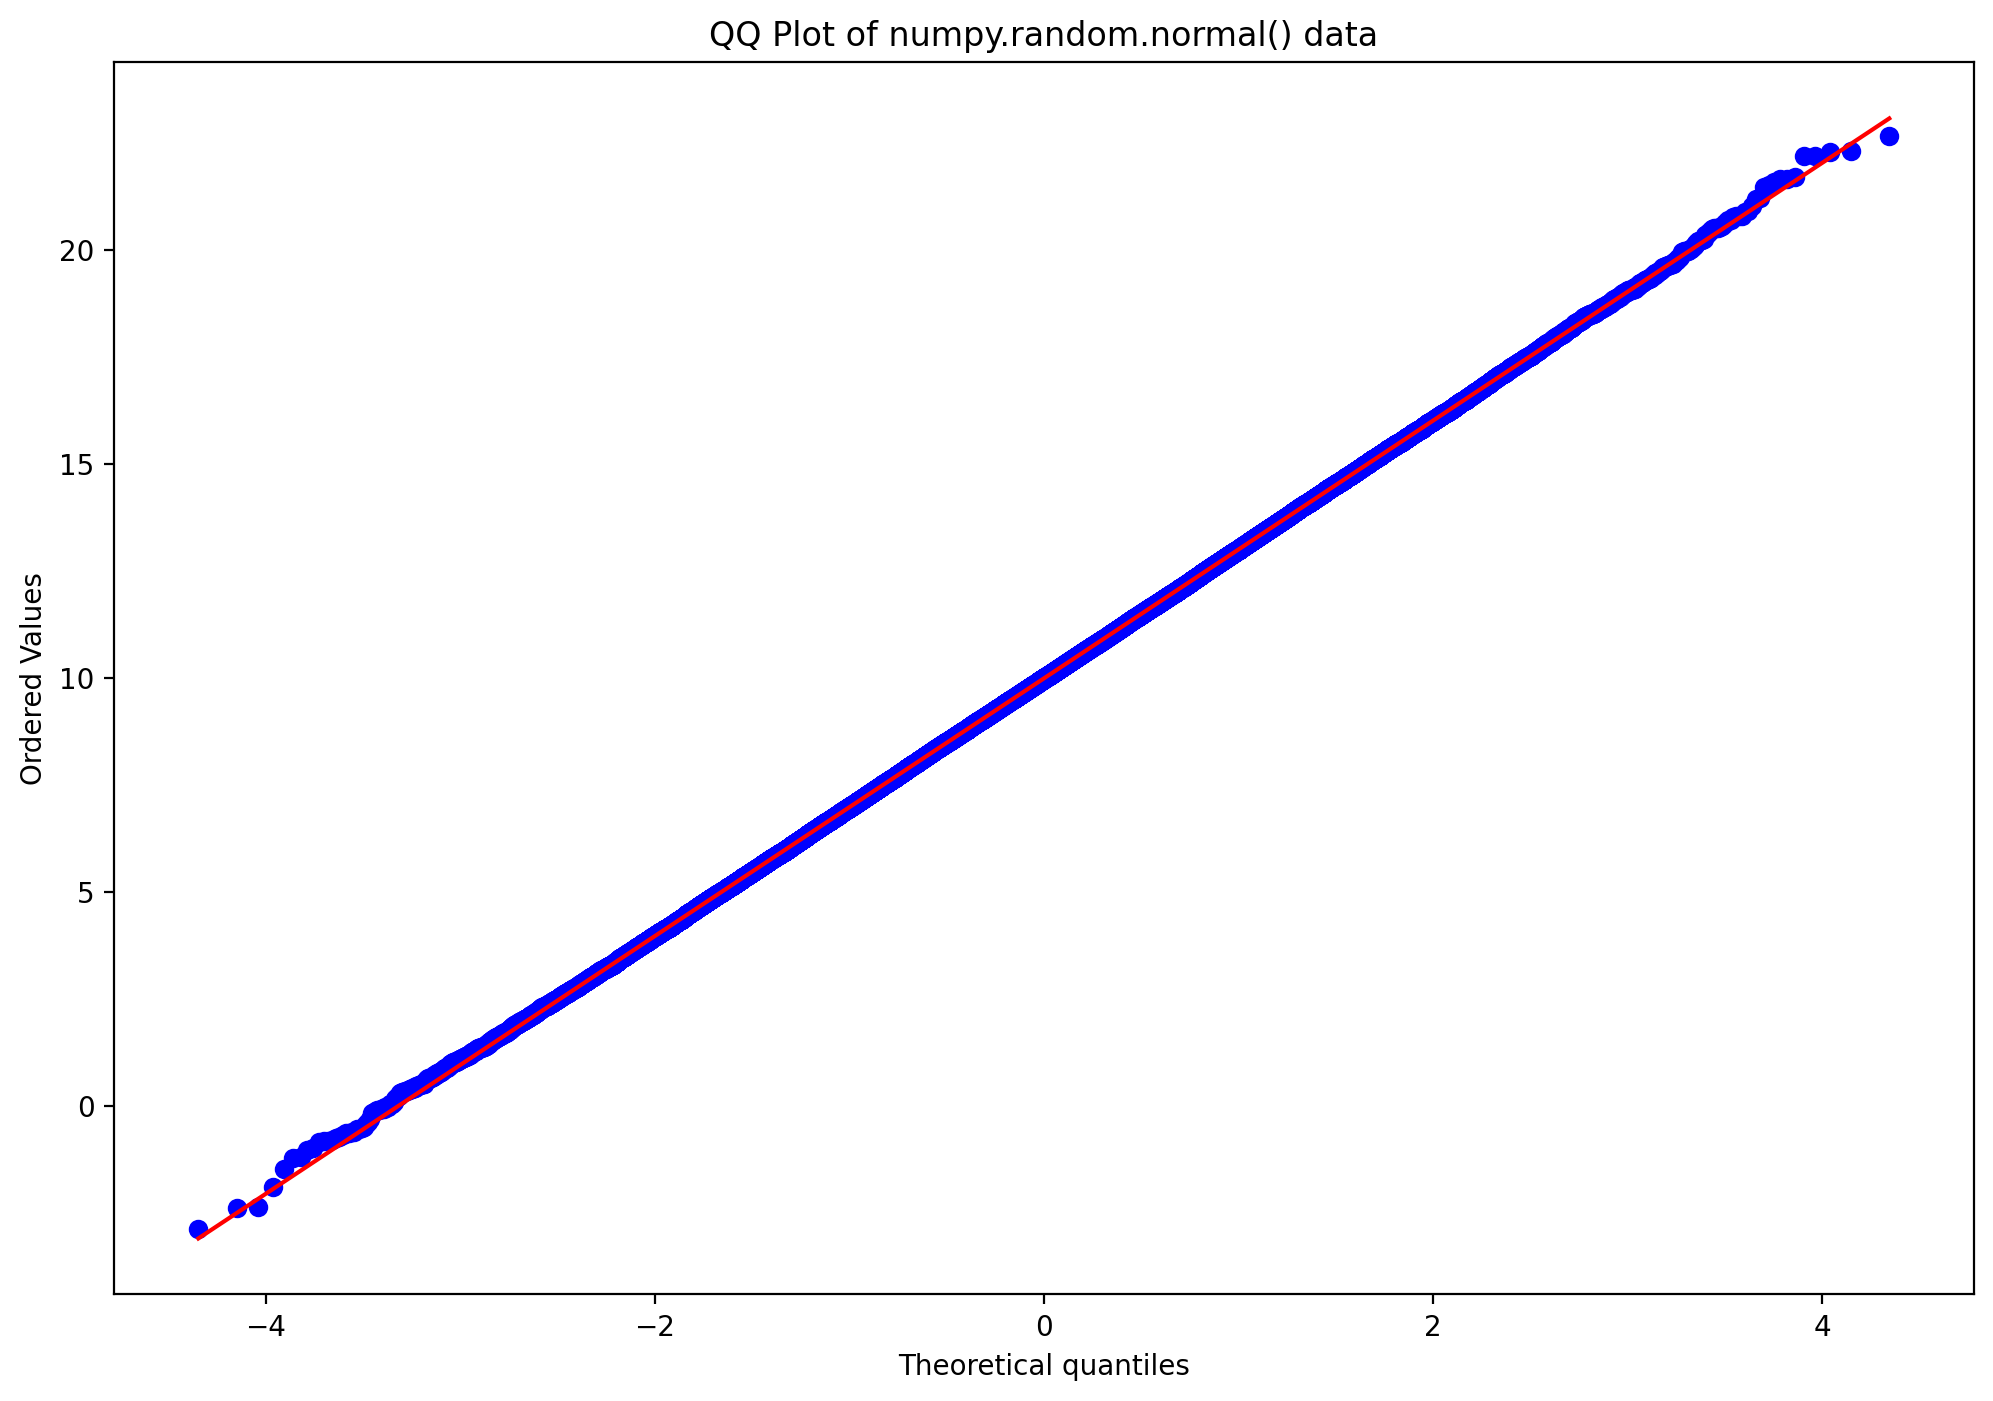

In [272]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 8))

# Create a q-q plot.
stat.probplot(y_values_norm, dist='norm', plot=ax)
plt.title("QQ Plot of numpy.random.normal() data")

# Show the QQ plot
plt.show()

When points shown in blue lie closer to the straight diagonal red line in a Q-Q plot the more normally distributed the data.


To conclude, we can say with a high degree of certainty that the numpy.random.normal() generated data follows a normal distribution. We have used statistical tests - The Shapiro-Wilk and Anderson-Darling tests and visualisations - histogram plot of data and the corresponding normal distribution probability density function and the QQ plot to confirm the normaility of the distribution. 

### The Shapiro-Wilk test

We can use the Shapiro-Wilk test to examine whether our `numpy.random.normal()` variable is normally distributed. 

The null hypothesis for the Shapiro-Wilk test is that
<div style="text-align: center; font-weight: bold;">
   a variable is normally distributed in some population.
</div>


A different way to say the same is that a variable’s values are a simple random sample from a normal distribution. As a rule of thumb, we

<div style="text-align: center; font-weight: bold;">
reject the null hypothesis if p < 0.05.
</div>
[1]

If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution. 


[1] https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/

[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro



In [273]:
shapiro_test = stat.shapiro(y_values_norm)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue < 0.05:
    print("The data does not follow a normal distribution (reject null hypothesis H0).")
else:
    print("The data follows a normal distribution (fail to reject null hypothesis H0).")

Shapiro-Wilk Test Statistic: 0.9999802114767802
p-value: 0.9208184539065895
The data follows a normal distribution (fail to reject null hypothesis H0).


c:\Users\shane\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


The Shapiro-Wilk test statistic is approximately 0.99997, and the p-value is approximately 0.9083.

computing a statistic based on the relationship between the observations and the expected order statistics of a normal distribution.The value of this statistic tends to be high (close to 1) for samples drawn from a normal distribution. In our case Statistic is effectively = 1 (0.9999705)

The comparison is quantified by the p-value: the proportion of values in the null distribution less than or equal to the observed value of the statistic. [2]

The null hypothesis of the Shapiro-Wilk test states that the sample is drawn from a normal distribution since the p-value of 0.9083 is much larger than the threshold aphla of 0.05. This indicates that we fail to reject the null hypothesis.

*** 
Scipy Stats also suggested an addiitonal normality test - Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling test tests the null hypothesis th
at a sample is drawn from a population that follows a particular distribution. This defaults to Normal but can be selected. ``dist='norm'``

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

In [274]:
anderson_test = stat.anderson(y_values_norm, dist='norm') # define distribtion as norm 
print("Anderson-Darling Test Statistic:", anderson_test.statistic)
print("Anderson-Darling Test critical values:", anderson_test.critical_values)
print("corresponding to the follwoing significance levels",anderson_test.significance_level)
print(anderson_test.fit_result) 

Anderson-Darling Test Statistic: 0.3322430339321727
Anderson-Darling Test critical values: [0.576 0.656 0.787 0.918 1.092]
corresponding to the follwoing significance levels [15.  10.   5.   2.5  1. ]
  params: FitParams(loc=9.989555204917478, scale=3.0107181479956395)
 success: True
 message: '`anderson` successfully fit the distribution to the data.'


we can see that the Anderson-Darling Statistic of 0.56143 < of critical values for significance levels 15%, 10%, 5%, 2.5%, and 1%. 

 where the significacne level is a threshold used in hypothesis testing to decide whether to reject the null hypothesis.

 Looking at the ``fit_results`` we can see the ``FitParams(loc=10.010642780438808, scale=2.9932761090776077)`` are within 1 % of our mean of 10 and standard deviation of 3. 

<span style="color:green">  

***

End of Task 2

***

</span>

<span style="color:lightblue">  

### Task 3: t-Test Calculation
***


Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

</span>

***

Import the dataset - data from the above table was saved to heart_rates.csv file in the data folder. Data is imported using relative paths so can be run with ease. 


In [275]:
#get the current working directory 
current_directory = os.getcwd()
# relative path from the notebook to the Excel file in the data folder
relative_path_data = "data\\heart_rates.csv"
# Join the two paths
file_path_data = os.path.join(current_directory, relative_path_data)
data = pd.read_csv(file_path_data) # import the .CSV file as panda dataframe 
data # show the dataframe

,Patient ID,Before,After
0,0,63,64
1,1,68,64
2,2,70,68
3,3,64,64
4,4,74,73
5,5,67,70
6,6,70,72
7,7,57,54
8,8,66,61
9,9,65,63


Rename data

- Group A - "Before" 
- Group B - "After"

In [276]:
group_a = data["Before"]
group_b = data["After"]

## Visualise the data using histogram, boxplots, Strip plot.

First lets plot the data using a few different plot types to get visual feel for the results 

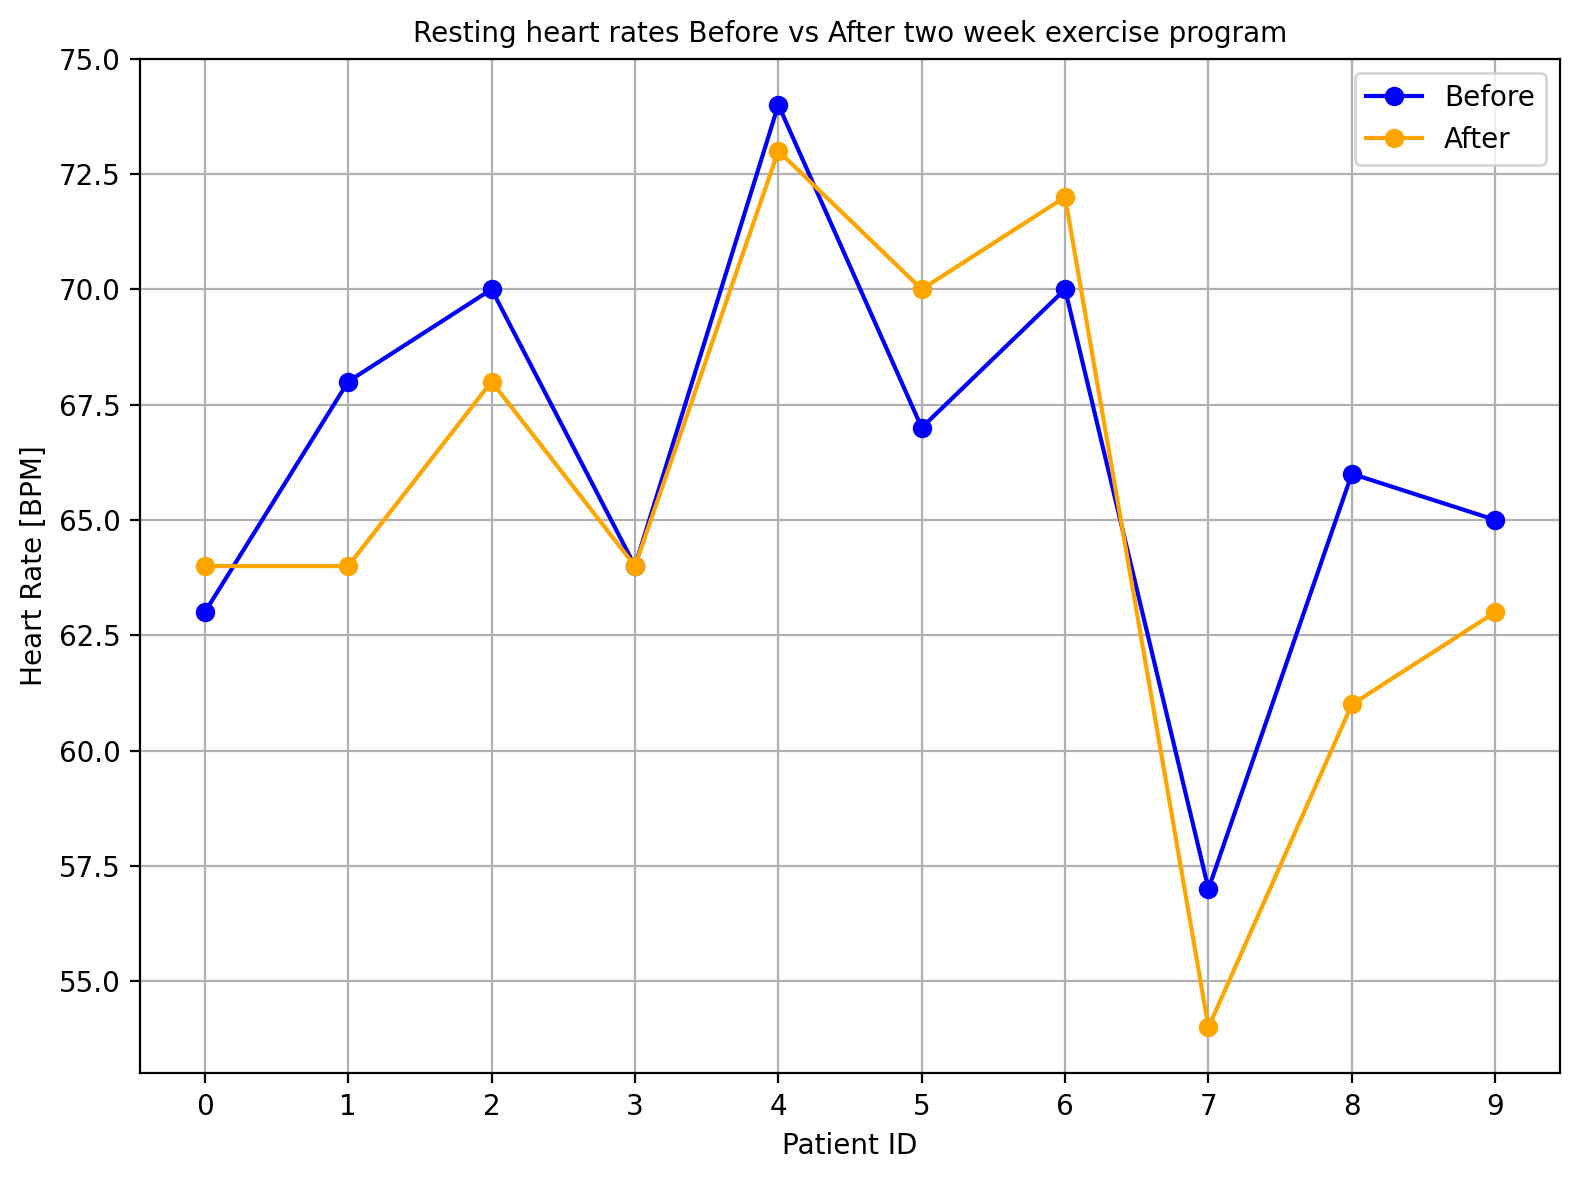

In [277]:
# Create a new plot for before vs. after measurements
plt.figure(figsize=(8, 6))

# Plot the 'before' and 'after' data
plt.plot(data["Before"], label="Before", marker="o", color="blue")
plt.plot(data["After"], label="After", marker="o", color="orange")

# Title and axis labels
plt.title(f"Resting heart rates Before vs After two week exercise program", fontsize=10)
plt.xlabel("Patient ID", fontsize=10)
plt.ylabel("Heart Rate [BPM]", fontsize=10)

# Add legend
plt.legend(fontsize=10)
plt.grid(True)

# Set x-ticks and labels to display only 0-9
plt.xticks(ticks=range(10), labels=range(10), fontsize=10)
# Adjust layout for better appearance
plt.tight_layout()
# Show the plot
plt.show()

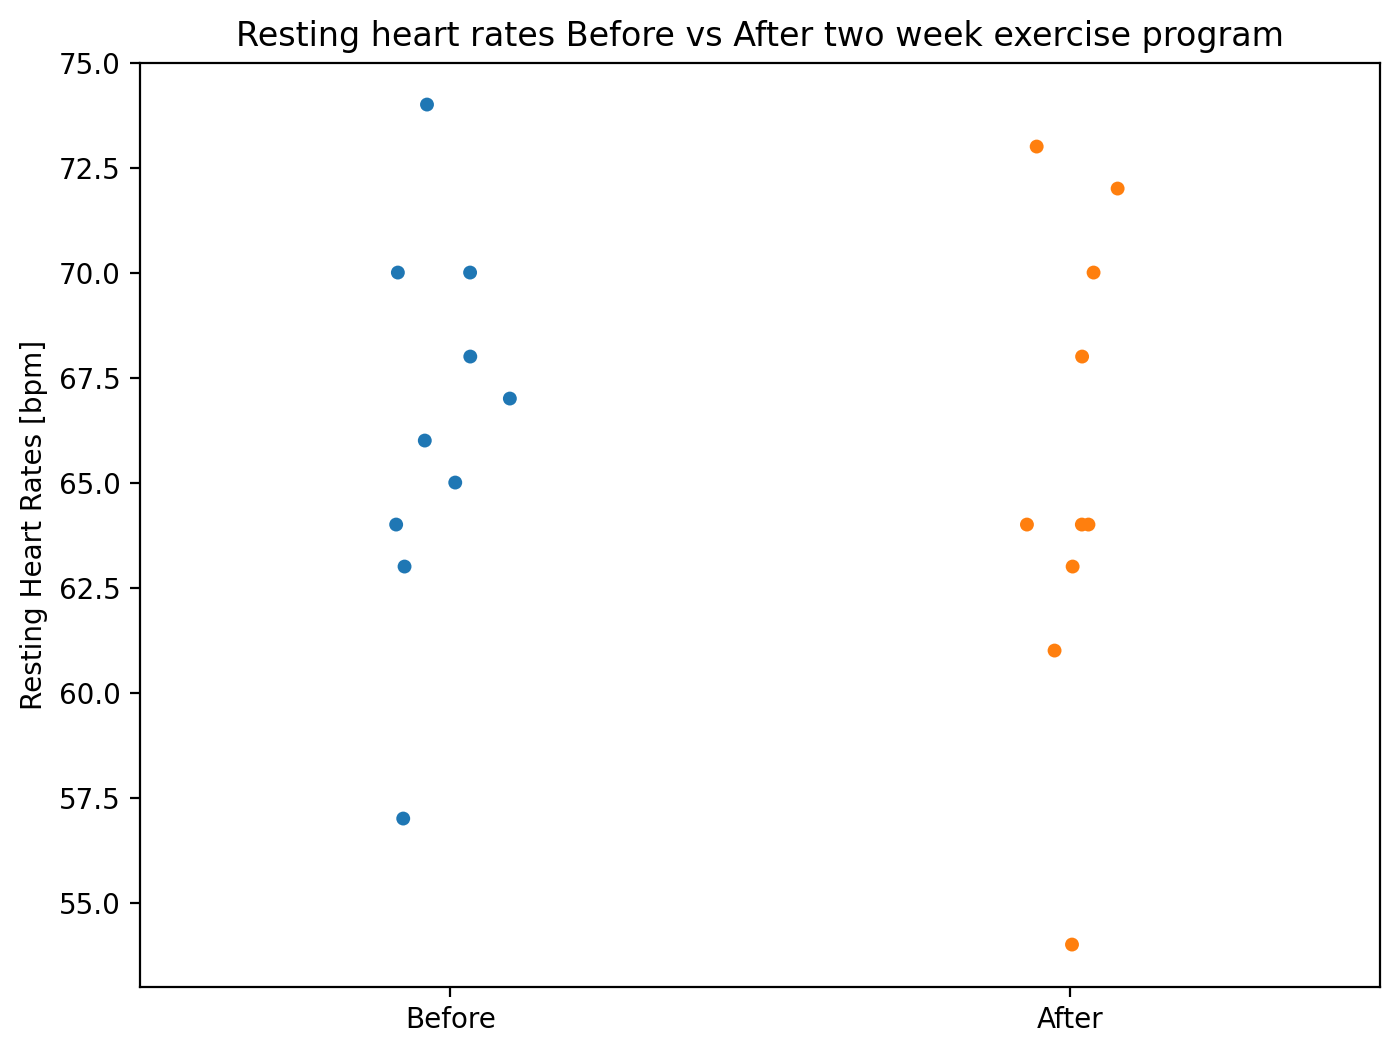

In [278]:
# Strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=[group_a, group_b])
plt.title("Resting heart rates Before vs After two week exercise program")
plt.ylabel("Resting Heart Rates [bpm]")
plt.show()

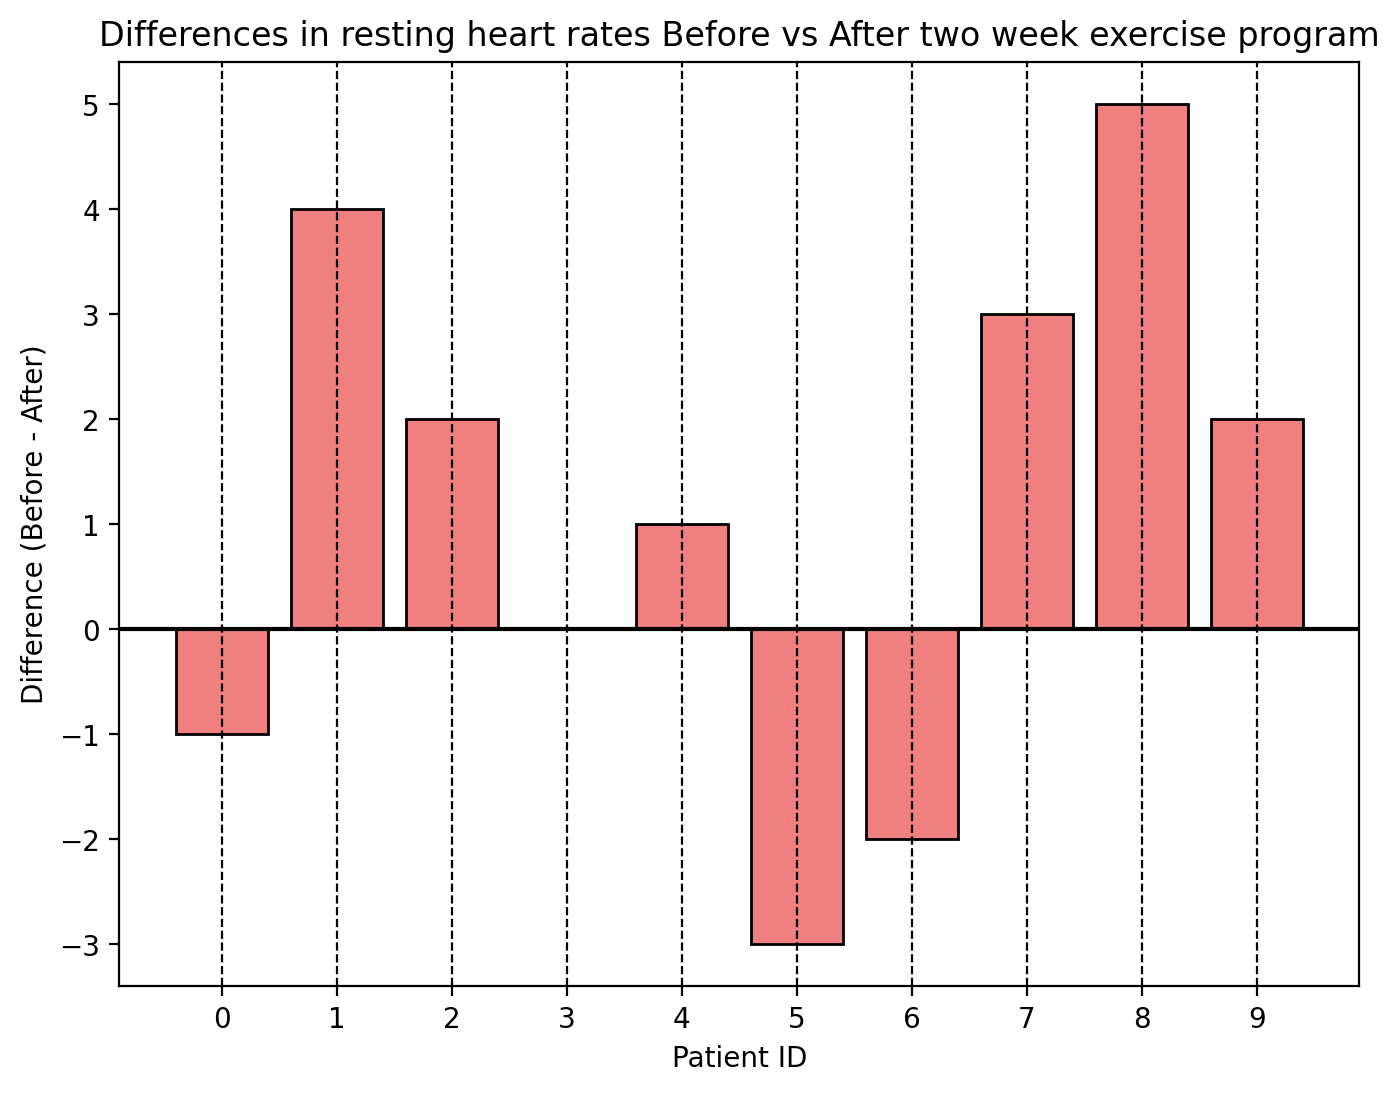

In [279]:
# Bar plot: Differences (Before - After)
diff = group_a - group_b
patients = [f"{i}" for i in range(len(data))]
plt.figure(figsize=(8, 6))
plt.bar(patients, diff, color="lightcoral",edgecolor='black')
plt.axhline(0, color="black")
plt.title("Differences in resting heart rates Before vs After two week exercise program")
plt.xlabel("Patient ID")
plt.ylabel("Difference (Before - After)")
plt.grid(axis='x',linestyle="--",color="black")
plt.show()

Plot the histogram for each group individually on the same figure. set the xlim the same for each. Label indicates the bin width for each. 

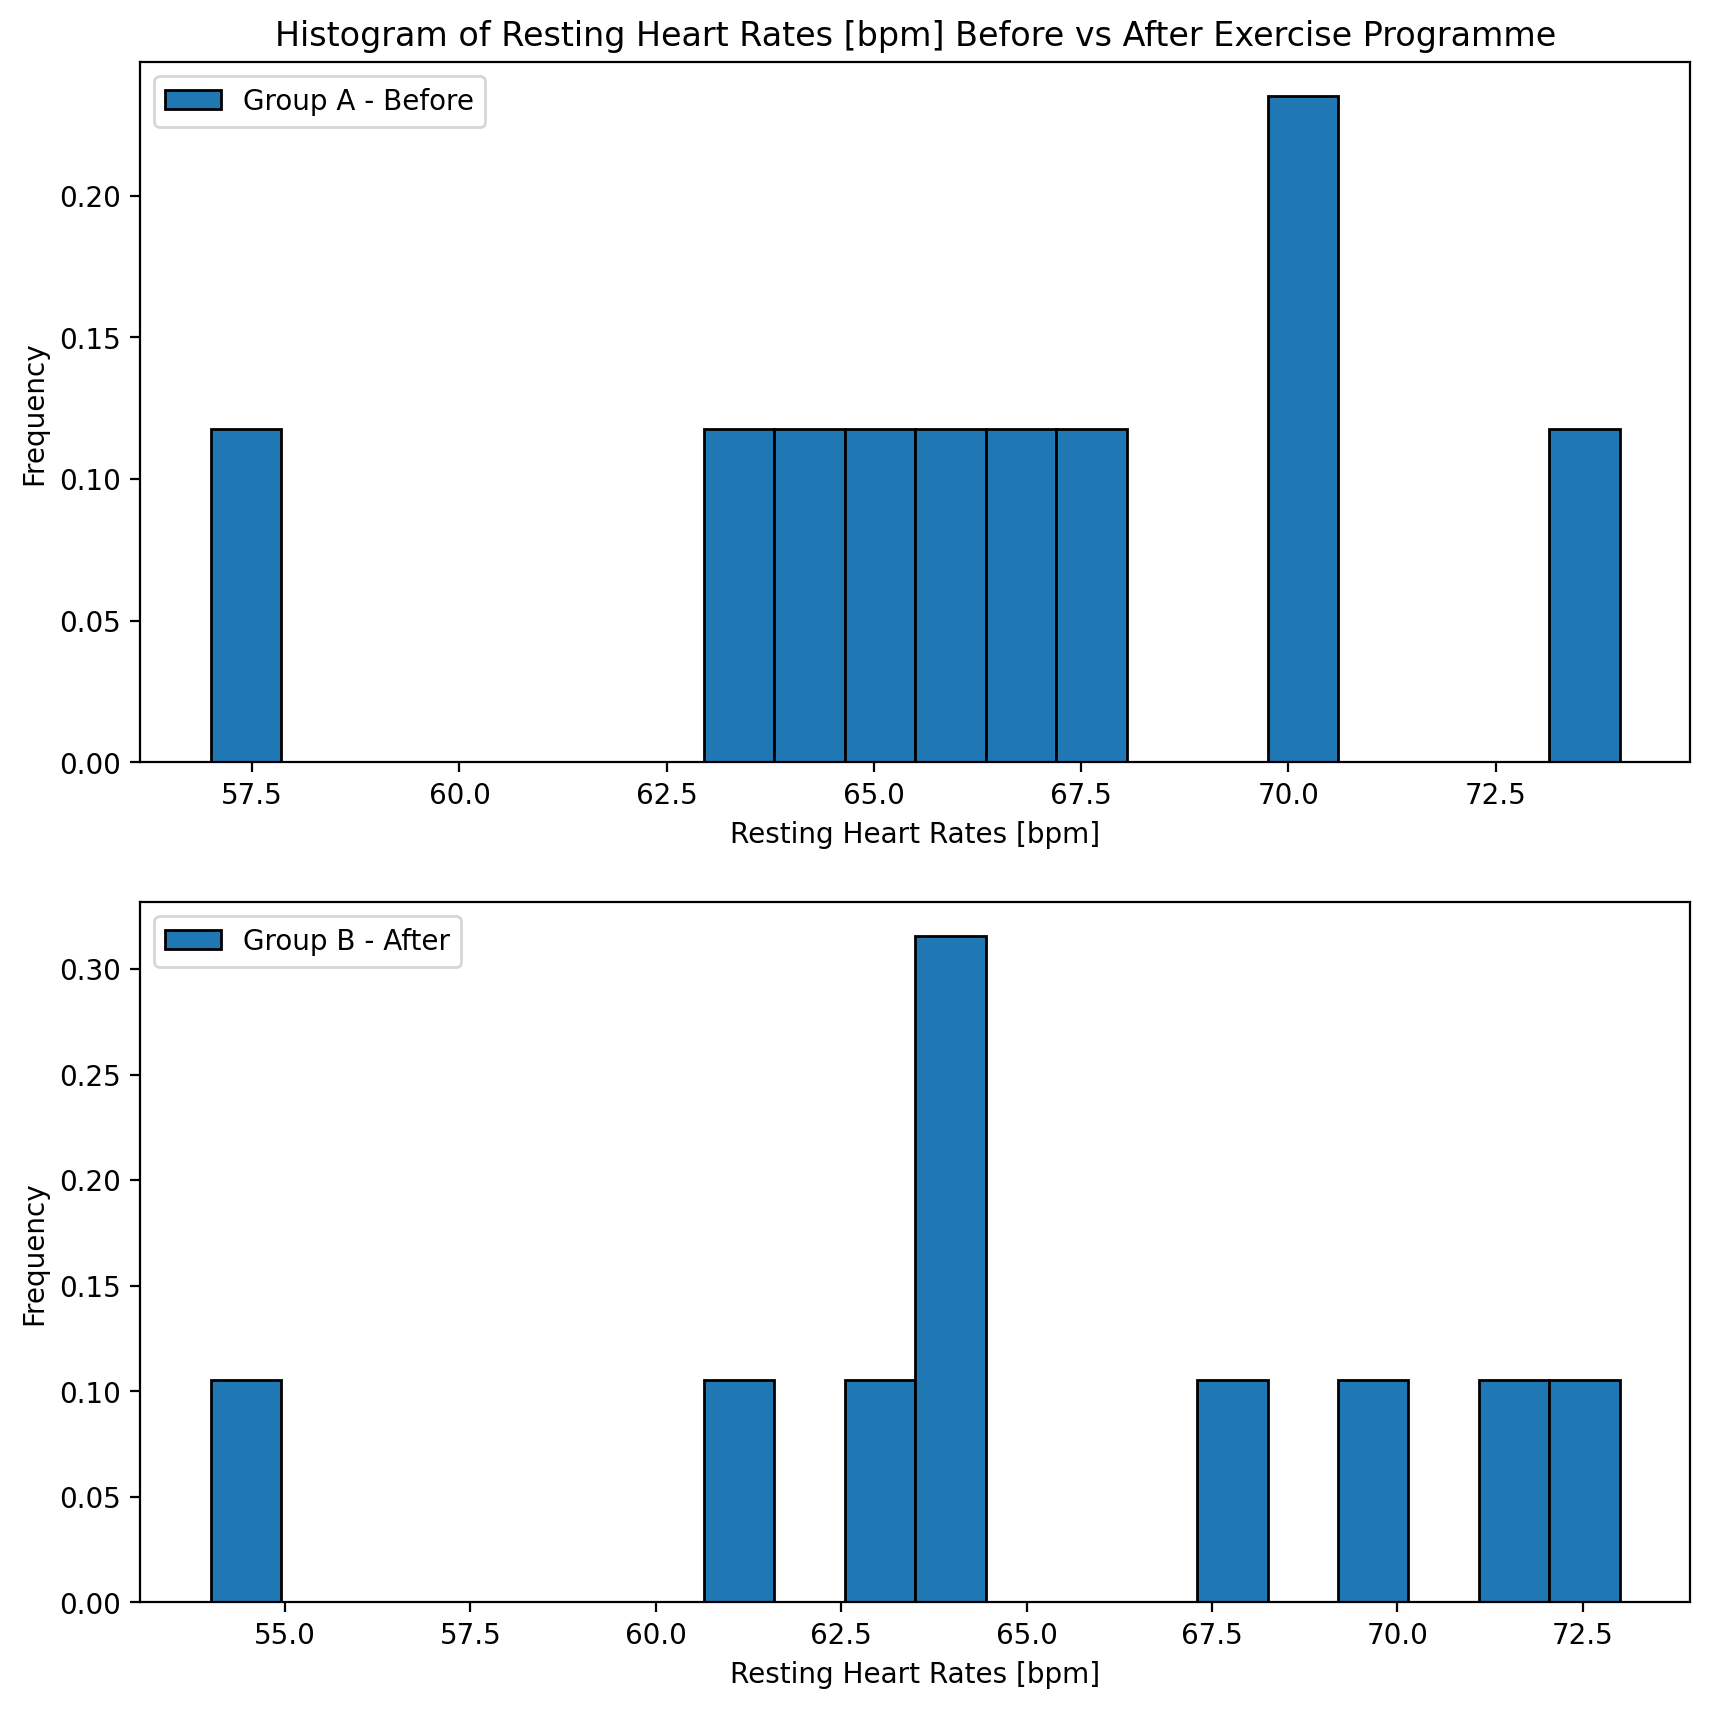

In [280]:
bins=20
fig, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0].hist(group_a, bins=bins, density=True, label=f'Group A - Before', edgecolor='black')
ax[0].set_title('Histogram of Resting Heart Rates [bpm] Before vs After Exercise Programme')
ax[0].set_xlabel('Resting Heart Rates [bpm]')
ax[0].set_ylabel('Frequency')
#ax[0].set_xlim(3, 6.5)
ax[0].legend(loc='upper left')
ax[1].hist(group_b, bins=bins, density=True, label=f'Group B - After', edgecolor='black')
ax[1].set_title('')
ax[1].set_xlabel('Resting Heart Rates [bpm]')
ax[1].set_ylabel('Frequency')
#ax[1].set_xlim(3, 6.5)
ax[1].legend(loc='upper left')
plt.show()

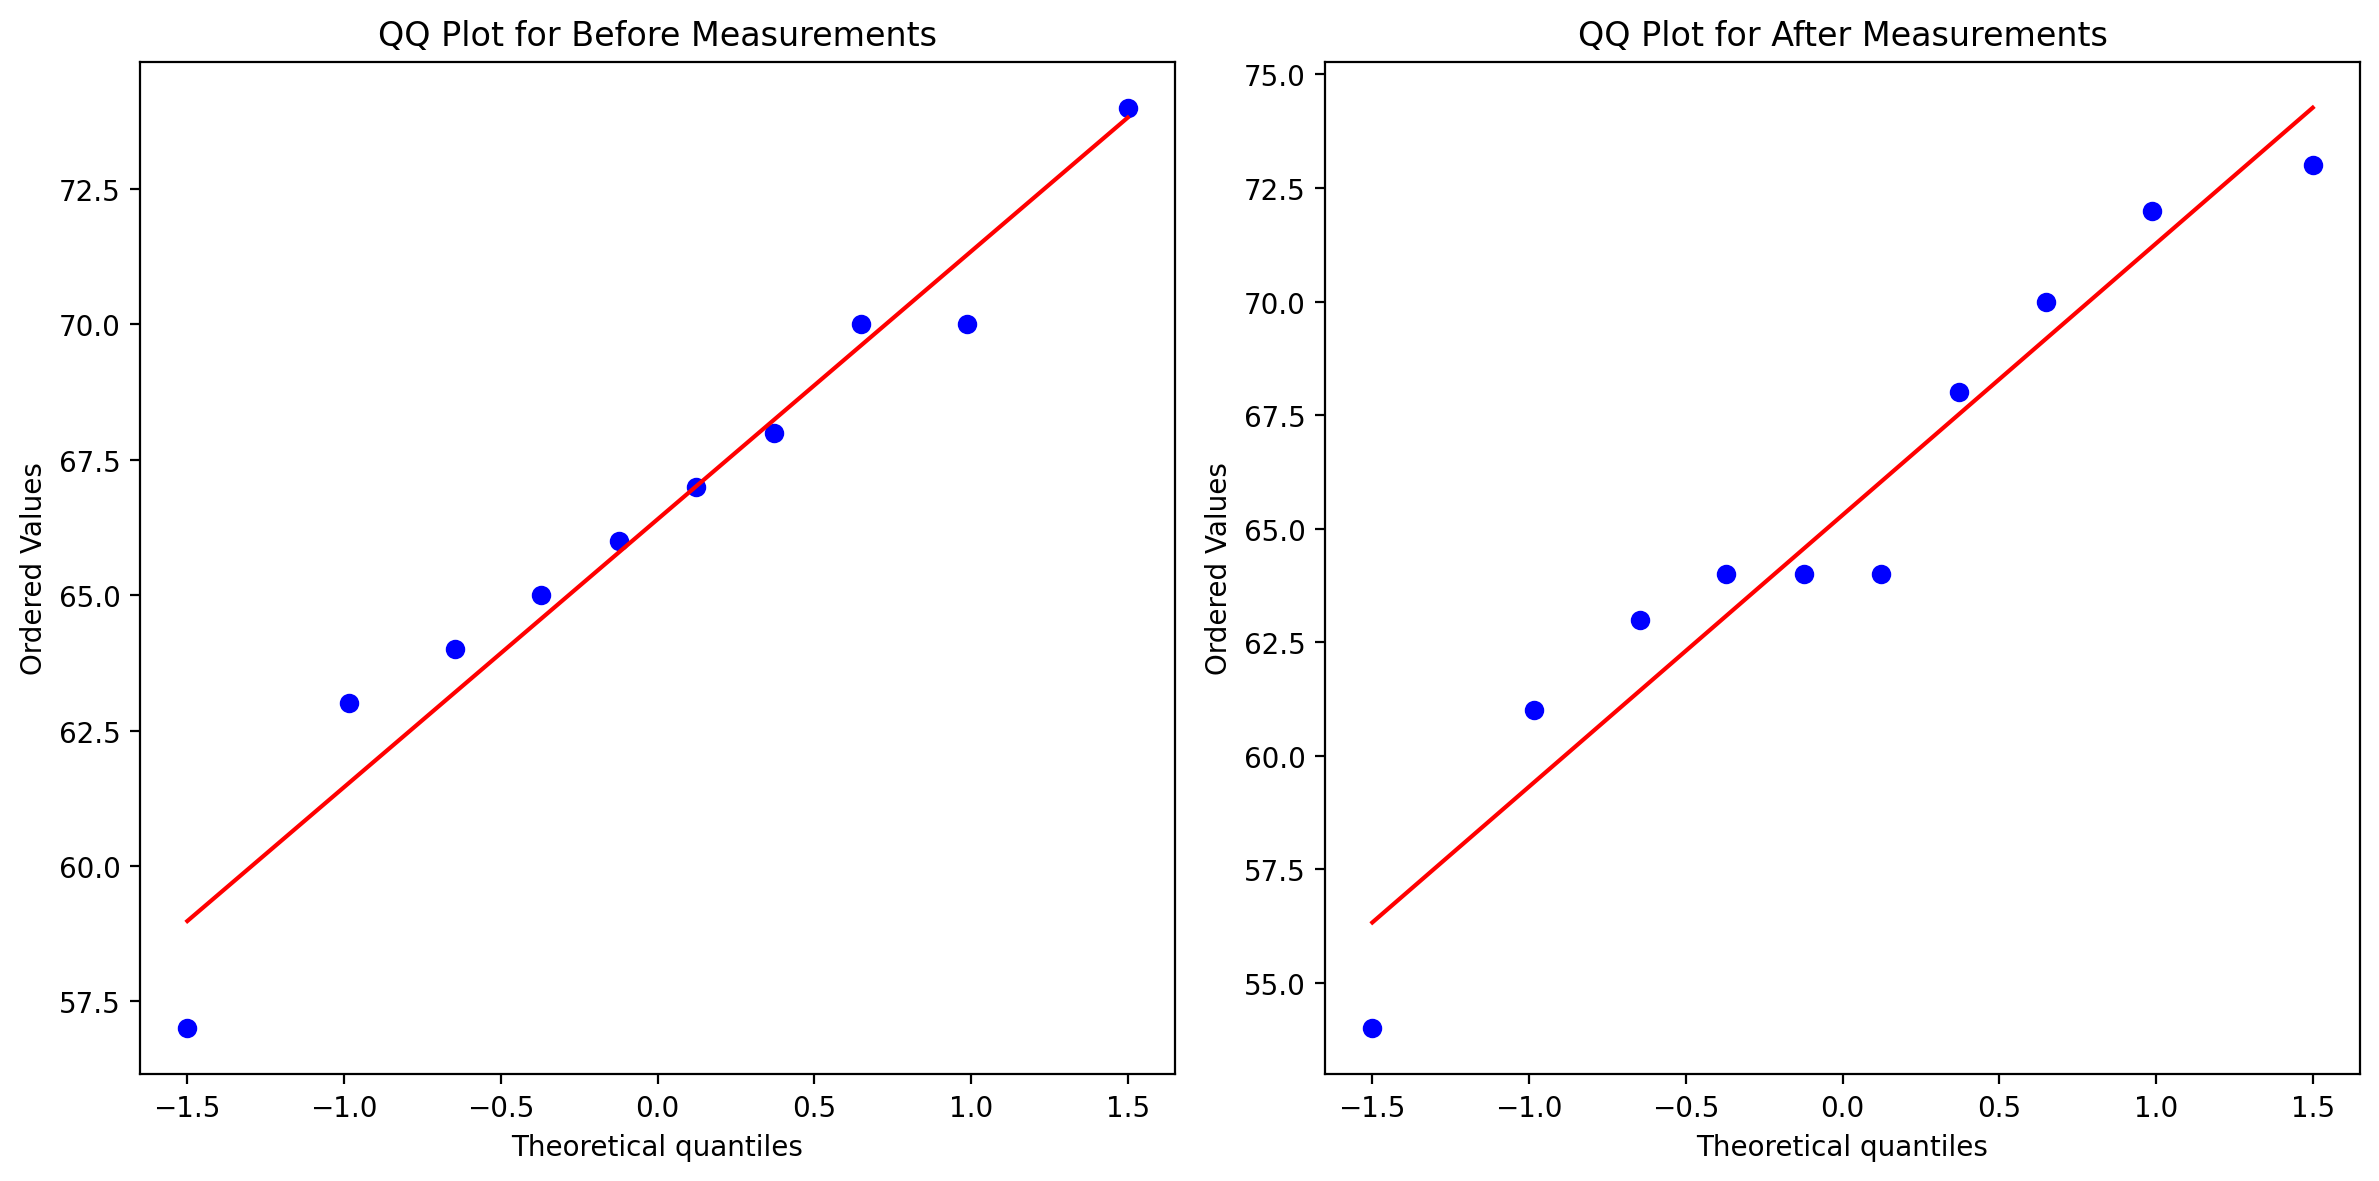

In [281]:
# Create a figure
plt.figure(figsize=(12, 6))

# QQ Plot for group_a - 'before'
plt.subplot(1, 2, 1)
stat.probplot(group_a, dist="norm", plot=plt)
plt.title("QQ Plot for Before Measurements")

# QQ Plot for group_b - 'after'
plt.subplot(1, 2, 2)
stat.probplot(group_b, dist="norm", plot=plt)
plt.title("QQ Plot for After Measurements")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

We can use the Shapiro-Wilk statistical test to examine whether the data is normally distributed. A test statistic close to one indicates that the data is likely to be normally distributed. 
The p-value threshold is 0.05 therefore if the p-value is greater than this threshold the null hypothesis is accepted.


In [282]:
shapiro_test = stat.shapiro(data["Before"])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
   print('The "Before" data follows a normal distribution (fail to reject null hypothesis H0).')
else:
    print('The "Before" data does not follow a normal distribution (reject null hypothesis H0).')


Shapiro-Wilk Test Statistic: 0.9726137534909091
p-value: 0.9139645311517168
The "Before" data follows a normal distribution (fail to reject null hypothesis H0).


In [283]:
shapiro_test = stat.shapiro(data["After"])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
   print('The "After"" data follows a normal distribution (fail to reject null hypothesis H0).')
else:
    print('The "After" data does not follow a normal distribution (reject null hypothesis H0).')

Shapiro-Wilk Test Statistic: 0.9397047620636736
p-value: 0.5497328687429658
The "After"" data follows a normal distribution (fail to reject null hypothesis H0).


For both the before and after results the test statistic is close to one and the p-value is greater than 0.05 and therefore there is no evidence to reject the null hypothesis that the data is normally distributed. 

This meets the t-Test requirement for the data to be normally distributed

## Type of t-test 

First question we should ask, is whether this data suitable for a t-test? 

Here we test the data against the four assumptions outlined on the [SPSS tutorial page](https://statistics.laerd.com/spss-tutorials/dependent-t-tests-using-spss-statistics.php)

Access to this page is restricted so I show screenshots from the lectures below 

<img src="img\laerd_t-test_assumptions1.png" alt="xkcd" width="800"/>
<img src="img\laerd_t-test_assumptions2.png" alt="xkcd" width="800"/>


- Assumption #1 - <span style="color:green">Satisfied.</span>  - dependent variable on continuous scale - 




- Assumption #2 - <span style="color:green">Satisfied.</span>  Related groups - Each patient's resting heart rate is measured "before" and "after" the exercise program. These two measurements are clearly paired to the same person. 




- Assumption #3 - <span style="color:green">Satisfied.</span>  no significant outliers 



- Assumption #4 -  <span style="color:green">Satisfied.</span>  the distribution of the differences in the dependent variable - shapiro- wilk test of normality - shown previously  








Paired  t-test is appropriate for this scenario because we are comparing two related samples (resting heart rates of the same patients before and after a two-week exercise program).


https://www.statisticshowto.com/t-statistic/

In [284]:

# Perform a paired t-test
t_stat, p_value = ttest_rel(group_a, group_b)

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.3372
P-value: 0.2140


So what is the T-statistic ? 

The T-statistic is used in a t-test to compare the means of one or two groups relative to the variability in the data. It evaluates whether the observed difference in means is statistically significant given the sample size and variation

The formula for the t-statistic in a paired t-test is:

$$
t = \frac{\bar{x}_d - \mu_d}{\sigma_d / \sqrt{n}}
$$
Where:
- $ t $ is the t-value

- $\bar{x}_d$ is the sample mean of the differences between the paired observations



-  $\mu_d $  is the population mean difference
-  $\sigma_d\ $  is the sample standard deviation of the differences
-  $ n $ is the number of paired observations


[1] https://en.wikipedia.org/wiki/T-statistic

[2] https://www.geeksforgeeks.org/t-test-in-statistics/

manually calculating the t-statistic, 

In [285]:
# fucntion to manually calculate t-statistic 
def t_statistic(paired_samples, mu_d=0):
    """
    Calculate the t-statistic for a paired t-test.

    Parameters:
    - paired_samples: DataFrame containing the 'Before' and 'After' columns
    - mu_d: Hypothesized mean difference (default is 0)

    Returns:
    - t_stat: The t-statistic value
    """
    # Calculate the differences between the paired samples (After - Before)
    differences = paired_samples['Before'] - paired_samples['After']
    
    # Mean of the differences
    x_d_bar = np.mean(differences)
    
    # Standard deviation of the differences
    sigma_d = np.std(differences, ddof=1)  # Sample standard deviation
    
    # Number of paired samples
    n = len(paired_samples)
    
    # Calculate the t-statistic
    t_stat = (x_d_bar - mu_d) / (sigma_d / np.sqrt(n))
    
    return t_stat

# Manual t-statistic calculation
t_stat_manual = t_statistic(data)
print(f"T-statistic (Manual): {t_stat_manual}")


T-statistic (Manual): 1.3372274824806278


``scipy.stats.ttest_rel`` handles all the calculations internally, including the t-statistic and p-value. 

In [286]:
def paired_t_test_scipy(df):
    # Perform the paired t-test using scipy.stats.ttest_rel
    t_stat, p_value = stats.ttest_rel(df['Before'], df['After'])
    
    return t_stat, p_value

# Using scipy to calculate t-statistic and p-value
t_stat_scipy, p_value_scipy = paired_t_test_scipy(data)

print(f"T-statistic (SciPy.stats): {t_stat_scipy}")
print(f"P-value (SciPy.stats): {p_value_scipy}")


T-statistic (SciPy.stats): 1.337227482480628
P-value (SciPy.stats): 0.21396011317404623



We can see the manually calculated value and the scipy.stats value for T-statistic are identical at approximately 1.3372

The significance of a t-statistic of 1.33 depends on several factors, including the degrees of freedom (df) and the chosen significance level (𝛼), which is typically 0.05 for a 95% confidence level.




Degrees of freedom (df) in statistical tests refer to the number of values in a calculation that can vary independently while still adhering to specified constraints. This concept is important for determining the critical value or distribution shape of a test statistic, such as the t-statistic in a t-test.

In this case, that is a Paired t-test, the degrees of freedom are calculated as n−1, where n represents the number of paired observations (for example, a "before" and "after" measurement pair). This reduction occurs because the mean difference for the entire dataset is calculated, limiting one degree of freedom.

For this dataset we have n = 10, therefore df = n-1 = 10-1 = 9. 

[1] https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/




In [287]:
import scipy.stats as stats

# Given values
n = 10  # sample size
alpha = 0.05  # significance level
t_statistic = 1.33  # observed t-statistic

# Degrees of freedom
df = n - 1

# Critical t-value for a two-tailed test
critical_t_value = stats.t.ppf(1 - alpha/2, df)

# P-value corresponding to the t-statistic
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Determine if the t-statistic is significant
is_significant = abs(t_statistic) > critical_t_value

# Output the results
print(f"Degrees of Freedom: {df}")
print(f"Critical t-value at alpha = {alpha} for two-tailed test: {critical_t_value:.4f}")
print(f"P-value for the t-statistic of {t_statistic}: {p_value:.4f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")


Degrees of Freedom: 9
Critical t-value at alpha = 0.05 for two-tailed test: 2.2622
P-value for the t-statistic of 1.33: 0.2162
Is the result significant? No


**Conclusion**: 
The analysis revealed no significant change in heart rate measurements before and after the intervention. 

Both datasets were confirmed to follow a normal distribution by using a Shapiro-Wilk test: \( p > 0.05 \). A paired t-test produced a \( p \)-value of 0.214, exceeding the significance threshold of 0.05. Consequently, the null hypothesis cannot be rejected, indicating that the mean heart rates before and after the intervention are statistically equivalent. 





Therefore, the intervention did not demonstrate a measurable effect on heart rate.


<span style="color:green">  

***
End of task 3

***

</span>

<span style="color:lightblue">  

### Task 4: ANOVA
***



In this test we will estimate the probability of committing a type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.

</span>

***

#### ANOVA Test
The one-way ANOVA test, conducted using ``scipy.stats.f_oneway``, evaluates whether there are significant differences among the means of the three samples. It examines whether the group means are equal under the null hypothesis ($H_0$) - that all group means are identical. 
$$
H_0: \mu_1 = \mu_2 = \mu_3
$$}


The test computes the F-statistic, which is the ratio of the variance between the groups to the variance within the groups:

$$
F = \frac{\text{variance between groups}}{\text{variance within groups}}
$$


A large F-statistic indicates that the variance between group means is substantially greater than the variance within groups, suggesting that at least one group mean is different.
A small p-value (typically less than 0.05) leads to rejecting the null hypothesis ($H_0$), which states that all group means are equal.

[1] https://en.wikipedia.org/wiki/F-test#One-way_analysis_of_variance



We can see that we have satisfied the requirements to perform a ANOVA test given on the SPSS tutorial page   
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  



<img src="img\ANOVA_assumptions1.png" alt="xkcd" width="800"/>


<img src="img\ANOVA_assumptions2.png" alt="xkcd" width="800"/>




- Assumption #1 - <span style="color:green">Satisfied.</span>  - dependent variable on continuous scale - 


- Assumption #2 - <span style="color:green">Satisfied.</span>  Related groups - Each patient's resting heart rate is measured "before" and "after" the exercise program. These two measurements are clearly paired to the same person. 


- Assumption #3 - <span style="color:green">Satisfied.</span> indepence of observations 

- Assumption #4 - <span style="color:green">Satisfied.</span>  no significant outliers 



- Assumption #5 -  <span style="color:green">Satisfied.</span>  the normality distribution dependent variable - shapiro- wilk test of normality - shown previously  



- Assumption #6 -  <span style="color:green">Satisfied.</span>  homogeneity of variance - Lavene's test. 



#### What is a Type II Error?
A **Type II error** occurs when the null hypothesis ($H_0$) is false, but the test fails to reject it. As show in the confusion table below


|                          | **Fail to Reject $H_0$** | **Reject $H_0$** |
|--------------------------|--------------------------|------------------|
| **$H_0$ is True**        | Correct Decision         | Type I Error     |
| **$H_0$ is False**       | Type II Error            | Correct Decision |


lets generate 3 samples using ``np.random.normal`` with $\mu_1 = 4.9,\quad \mu_2 = 5.0,\quad \mu_3 = 5.1$ and calculate the F-statistic using ``scipy.stats.f_oneway``, 

In [292]:
y_values_norm1 = np.random.normal(4.9, 0.1, 100)
y_values_norm2 = np.random.normal(5.0, 0.1, 100)
y_values_norm3 = np.random.normal(5.1, 0.1, 100)

# Calculate F using scipy.
stats.f_oneway(y_values_norm1, y_values_norm2, y_values_norm3)

F_onewayResult(statistic=92.27839325924293, pvalue=6.779190385460949e-32)

F-statistic: 92.28 — this very large value indicates that the variance between the group means is much greater than the variance within the groups.
p-value is significantly smaller than 0.05, therefore we reject the null hypothesis ($H_0$) that all group means are identical.

a Type II error will only arise if we fail to reject the null hypothesis ($H_0$). Lets now loop through 10,000 times and see if we obtain any type II errors from the data. 

In [ ]:
# Type II error count
no_type_ii = 0

# loop through 10,000 times 
for _ in range(10000):
    # using numpy.random.normal function generate normal distribution 
    y_values_norm1 = np.random.normal(4.9, 0.1, 100)
    y_values_norm2 = np.random.normal(5.0, 0.1, 100)
    y_values_norm3 = np.random.normal(5.1, 0.1, 100)

    f_stat, p_value = stat.f_oneway(y_values_norm1, y_values_norm2, y_values_norm3)
    
    # Check for Type II error (fail to reject null hypothesis)
    if p_value > 0.05:
        no_type_ii += 1

# Print the results
print(f"Number of Type II errors: {no_type_ii}")


Number of Type II errors: 0


I wonder if the number of iterations was increased to 1,000,000 would we see a type II error arise ? 

I ran this code - it took 5 mins and gave the same result 

``Number of Type II errors: 0``

*Conclusions*:
- we have shown that performing 10,000+ ANOVA tests using ``scipy.stats.f_oneway`` on the 3 datasets generated using ``np.random.normal`` with $\mu_1 = 4.9,\quad \mu_2 = 5.0,\quad \mu_3 = 5.1$  ``scipy.stats.f_oneway``, produces 0 Type II errors 


- A **Type II error** only occures when we *fail to reject the null hypothesis* ($H_0$) even though it is false (i.e., when the group means are actually different).


<span style="color:green">  

***
End of task 4 - Complete 

***

</span>

# 